In [3]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np

os.chdir("../src/")

from dataset_util import Dataset
from matplotlib import pyplot as plt

ds = Dataset()

1. 引入特征
4. 数据集分割
1. 调参
2. 模型加深


In [4]:
ds.train = pd.merge(ds.train, ds.label, on="sequence")

<AxesSubplot:xlabel='count', ylabel='mean'>

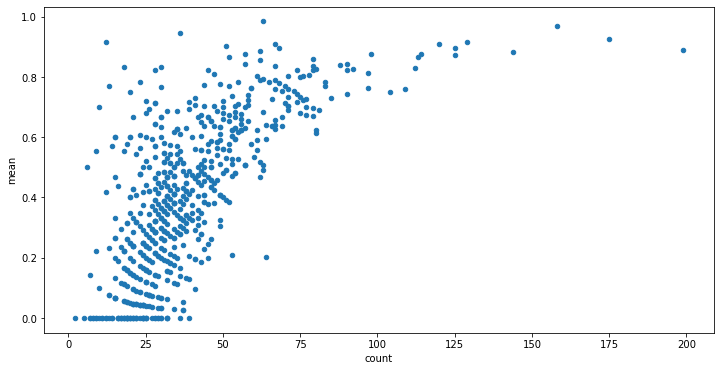

In [181]:
temp = ds.train[["sequence", "subject", "state"]].drop_duplicates()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
temp.groupby("subject").agg(
    mean=("state", "mean"), count=("state", "count")
).sort_values("count").plot.scatter(x="count", y="mean", ax=ax)

In [9]:
from pivottablejs import pivot_ui

pivot_ui(ds.train.head(), outfile_path="1.html")

In [8]:
pivot_ui(ds.train.head())